/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


En iyi hiperparametreler: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
En iyi doğruluk değeri: 0.7812293853073464
Model Doğruluğu (Test Verisi): 0.7447916666666666


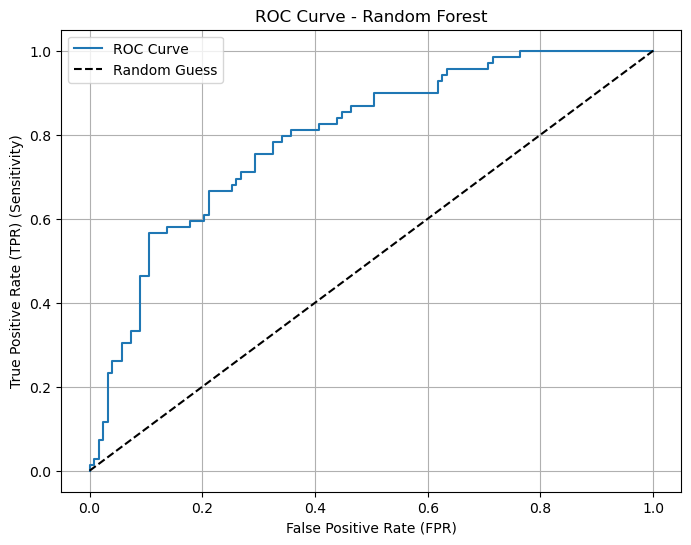

AUC Değeri: 0.794862731236008


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Veri setini yükledik.
data = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')

# Bağımsız değişkenleri ve hedef değişkeni ayırdık.
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Önemli özellikleri seçtik.(Korelasyon haritasına göre).
important_features = ["Glucose", "BMI", "Age", "Pregnancies"]

X_important = X[important_features]

# Veriyi train ve test kümelerine ayırdık.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.25, random_state=42)

# Hiperparametre optimizasyonu
param_grid = {
    'n_estimators': [50, 100, 200, 300], # Ağaç sayısı
    'max_depth': [None, 5, 10, 20],      # Ağacın maksimum derinliği
    'min_samples_split': [2, 5, 10],     # Dallanma için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],       # Yapraklar için minimum örnek sayısı
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# En iyi hiperparametreler ve en iyi doğruluk değeri
print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi doğruluk değeri:", grid_search.best_score_)

# Test veri kümesi üzerinde tahmin yaptık
y_pred = grid_search.predict(X_test)

# Doğruluk değerini hesapladık.
accuracy = accuracy_score(y_test, y_pred)
print("Model Doğruluğu (Test Verisi):", accuracy)

# Test veri kümesi üzerinde olasılık değerlerini aldık.
y_prob = grid_search.predict_proba(X_test)[:, 1]

# ROC eğrisini çizelim
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) (Sensitivity)')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

# AUC (Alan Altındaki Eğri) değeri
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Değeri:", auc_score)